In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv("D:/Top Mentor/ml/2 july linear regression/day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df.shape

(731, 16)

# Variable Identification

1. First, identify Predictor (Input) and Target (output) variables

In [16]:
# We have to predict the cnt so our target(Output) variable will be "cnt" 
# and remaiming columns will be Predictors(Input variables)
y = targets = df["cnt"]
X = predictors =df.drop(["cnt"],axis=1)

In [17]:
X.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [18]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [19]:
X.shape

(731, 15)

In [20]:
y.shape

(731,)

In [21]:
# Print the Target and Input Variables
print("Input Variables", list(X.columns))
print("Output Variable", "['cnt']")

Input Variables ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
Output Variable ['cnt']


### 2. Identify the data type of the variables.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Univariate Analysis

We explore variables one by one.

Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

In [23]:
# Run discriptive statistics of numerical datatypes.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<Axes: ylabel='season'>

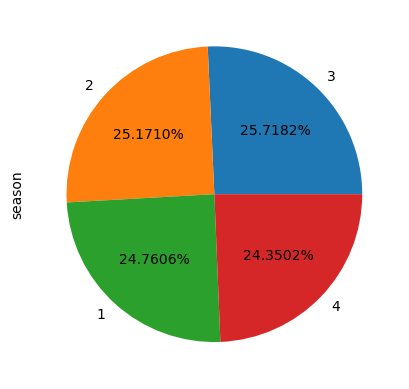

In [24]:
df['season'].value_counts().plot(kind='pie',autopct='%1.4f%%')

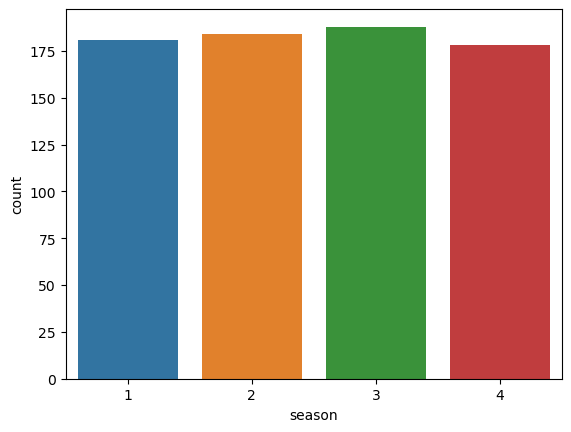

In [25]:
sns.countplot(x="season",data=df)
plt.show()

<Axes: ylabel='yr'>

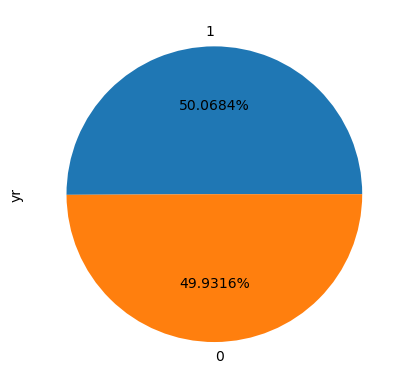

In [26]:
df['yr'].value_counts().plot(kind='pie',autopct='%1.4f%%')

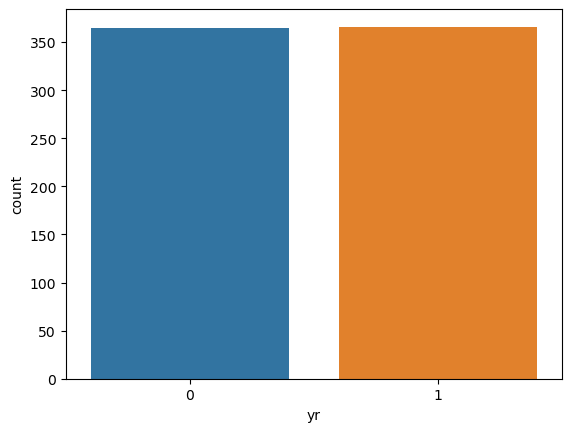

In [32]:
sns.countplot(x="yr",data=df)
plt.show()

<Axes: ylabel='weekday'>

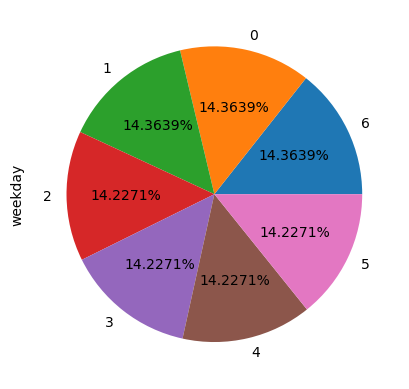

In [33]:
df['weekday'].value_counts().plot(kind='pie',autopct='%1.4f%%')

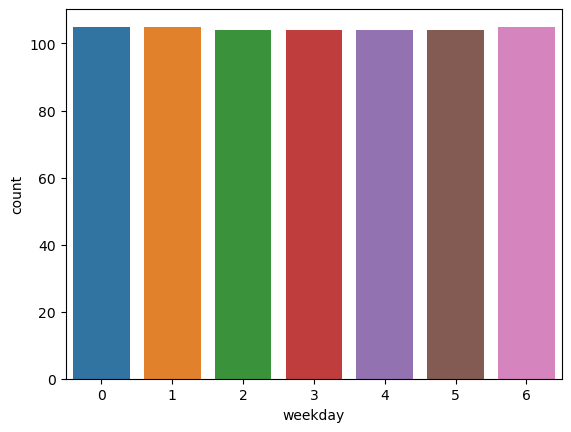

In [34]:
sns.countplot(x="weekday",data=df)
plt.show()

<Axes: ylabel='holiday'>

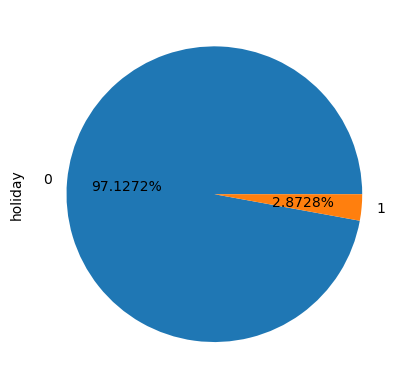

In [35]:
df['holiday'].value_counts().plot(kind='pie',autopct='%1.4f%%')

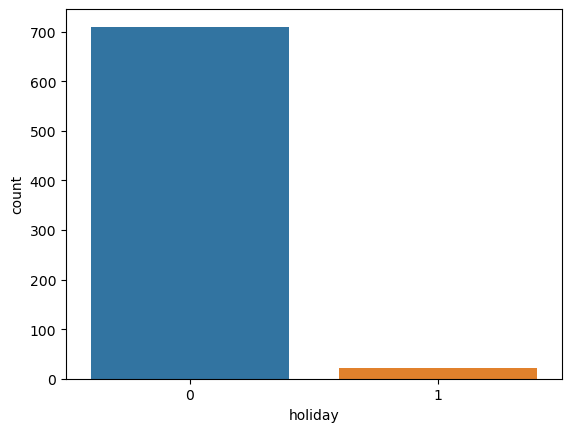

In [36]:
sns.countplot(x="holiday",data=df)
plt.show()

<Axes: ylabel='workingday'>

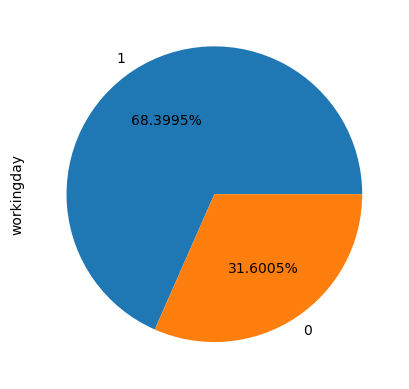

In [37]:
df['workingday'].value_counts().plot(kind='pie',autopct='%1.4f%%')

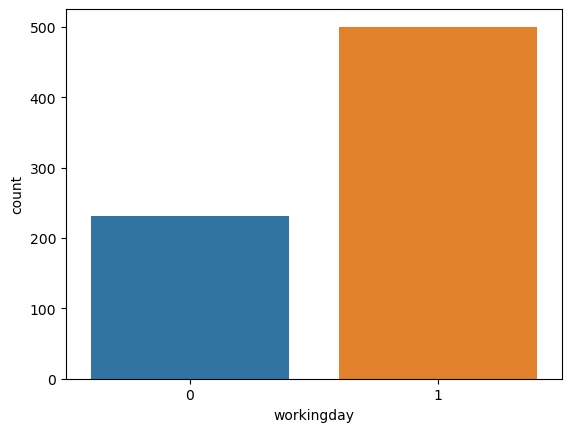

In [38]:
sns.countplot(x="workingday",data=df)
plt.show()

<Axes: ylabel='weathersit'>

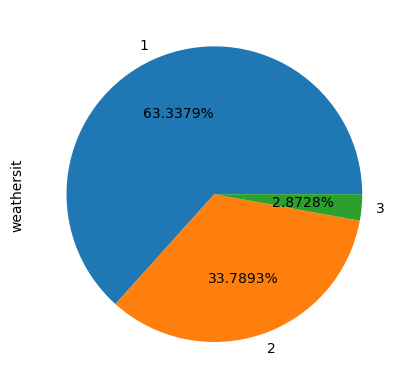

In [39]:
df['weathersit'].value_counts().plot(kind='pie',autopct='%1.4f%%')

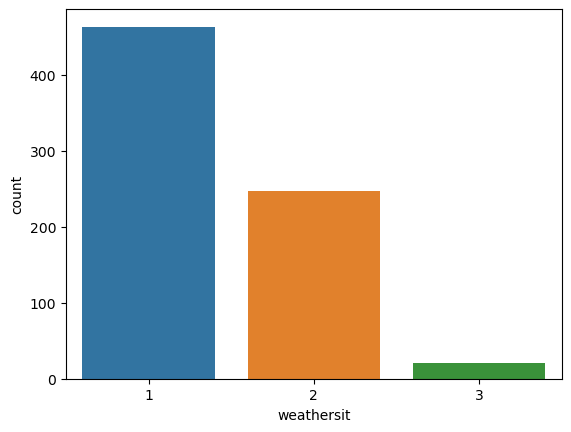

In [40]:
sns.countplot(x="weathersit",data=df)
plt.show()

<Axes: >

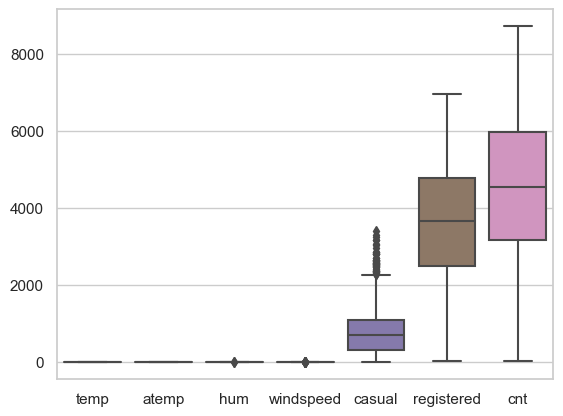

In [41]:
sns.set(style="whitegrid")
sns.boxplot(data=df[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])

In [43]:
df['date']=pd.to_datetime(df['dteday'])    #here we seperste date,day and month
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df['day']=df['date'].dt.day
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,month,year,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1,2011,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,1,2011,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,1,2011,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,1,2011,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,1,2011,5


<Axes: ylabel='month'>

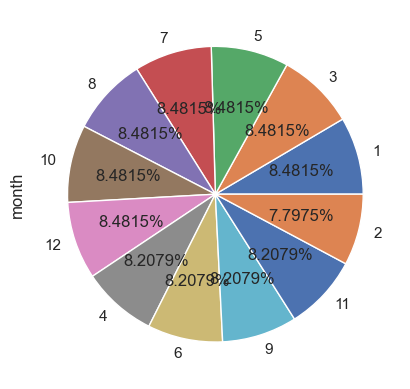

In [44]:
df['month'].value_counts().plot(kind='pie',autopct='%1.4f%%')

<Axes: xlabel='month', ylabel='count'>

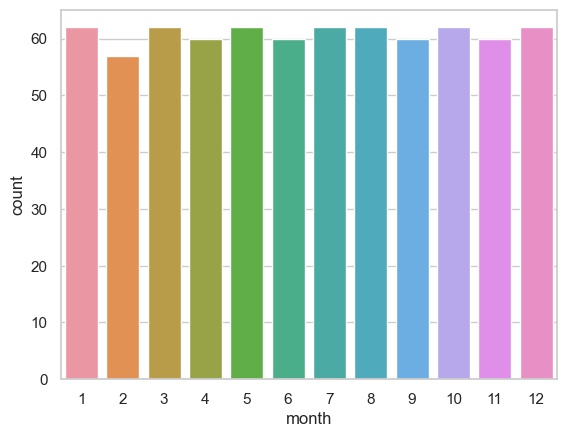

In [45]:
sns.countplot(x="month",data=df)

<Axes: xlabel='day', ylabel='count'>

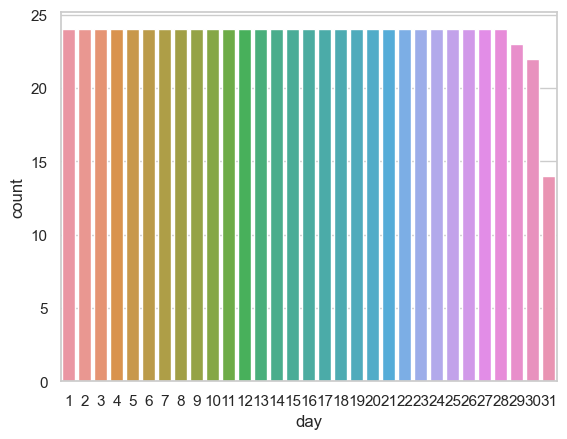

In [47]:
sns.countplot(x="day",data=df)

# Bivariate Analysis

1.We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.

2.The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

3.Different methods are used to tackle these combinations during analysis process.

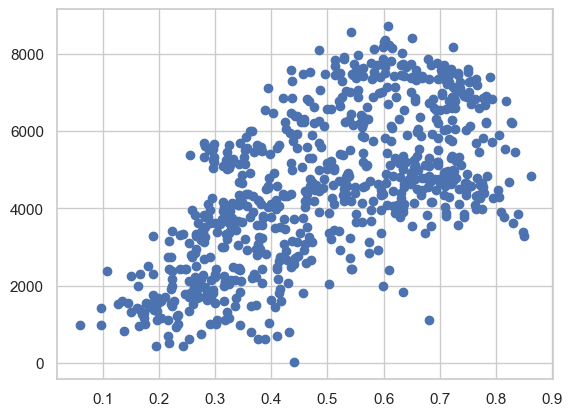

In [48]:
plt.scatter(x='temp',y='cnt',data=df)
plt.show()

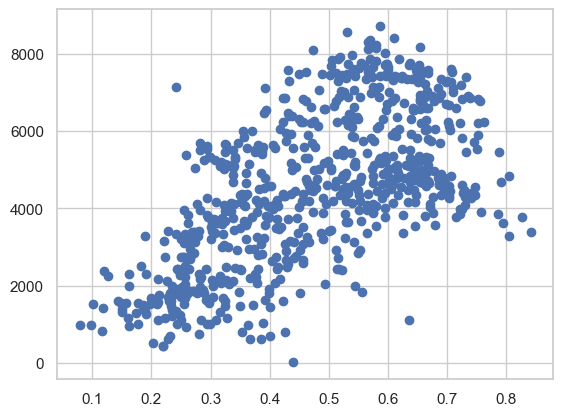

In [49]:
plt.scatter(x='atemp',y='cnt',data=df)
plt.show()

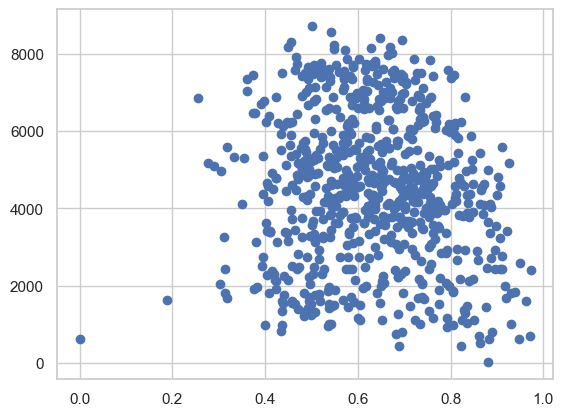

In [50]:
plt.scatter(x='hum',y='cnt',data=df)
plt.show()

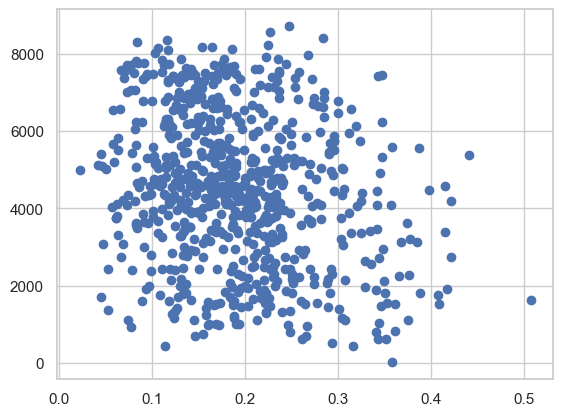

In [51]:
plt.scatter(x='windspeed',y='cnt',data=df)
plt.show()

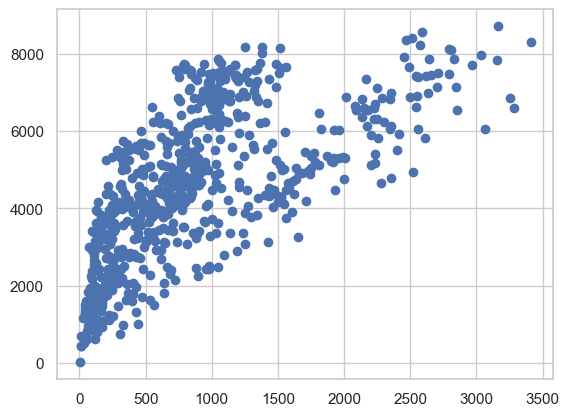

In [53]:
plt.scatter(x='casual',y='cnt',data=df)
plt.show()

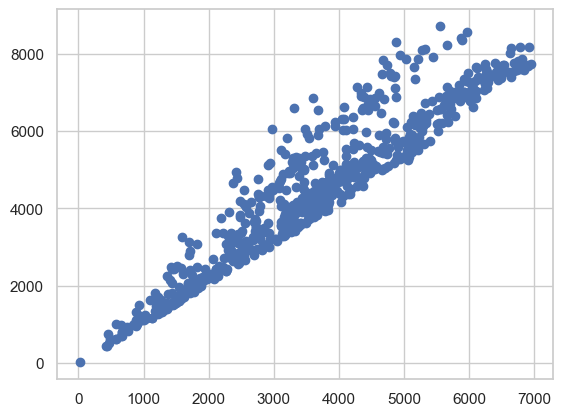

In [54]:
plt.scatter(x='registered',y='cnt',data=df)
plt.show()

In [59]:
cor=df.corr()
cor.nlargest(15,['cnt'])['cnt']

C:\Users\DELL\AppData\Local\Temp\ipykernel_6116\2843772478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
year          0.566710
yr            0.566710
season        0.406100
mnth          0.279977
month         0.279977
weekday       0.067443
workingday    0.061156
day          -0.024204
holiday      -0.068348
Name: cnt, dtype: float64

In [63]:
#we have 4 season so we will create a dummy
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day,weathersit_1,weathersit_2,weathersit_3
0,0,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,2011,1,0,1,0
1,0,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,2011,2,0,1,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,2011,3,1,0,0
3,0,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,2011,4,1,0,0
4,0,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,2011,5,1,0,0


In [64]:
#we have 3 weather so we will create a dummy
weather=pd.get_dummies(df['weathersit'],prefix='weathersit')
df=pd.concat([df,weather],axis=1)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day,weathersit_1,weathersit_2,weathersit_3
0,0,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,2011,1,0,1,0
1,0,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,2011,2,0,1,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,2011,3,1,0,0
3,0,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,2011,4,1,0,0
4,0,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,2011,5,1,0,0


In [67]:
df=df.drop(['season','instant','weathersit','dteday','date','mnth'],axis=1)
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,month,year,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,...,1,2011,1,1,0,0,0,0,1,0
1,0,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,...,1,2011,2,1,0,0,0,0,1,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,1,2011,3,1,0,0,0,1,0,0
3,0,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,...,1,2011,4,1,0,0,0,1,0,0
4,0,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,...,1,2011,5,1,0,0,0,1,0,0


In [71]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [72]:
df['year'].unique()

array([2011, 2012], dtype=int64)

# Multivariate Analysis

We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables.

The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

Different methods are used to tackle these combinations during analysis process.

In [76]:
cor=df.corr()
cor.nlargest(21,['cnt'])['cnt']

cnt             1.000000
registered      0.945517
casual          0.672804
atemp           0.631066
temp            0.627494
year            0.566710
yr              0.566710
season_3        0.346487
month           0.279977
weathersit_1    0.252870
season_2        0.146197
weekday         0.067443
season_4        0.065593
workingday      0.061156
day            -0.024204
holiday        -0.068348
hum            -0.100659
weathersit_2   -0.172879
windspeed      -0.234545
weathersit_3   -0.239958
season_1       -0.563094
Name: cnt, dtype: float64

# Linear Regression

In [77]:
#split the data

In [81]:
x = df.drop(['cnt'],axis=1)
y = df['cnt']

In [82]:
x.shape

(731, 20)

In [83]:
y.shape

(731,)

In [84]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
len(X_train)


584

In [105]:
len(y_train)

584

In [123]:
len(X_test),len(y_test)

(147, 147)

In [88]:
# give the data to the model 

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
# m values 
lr.coef_

array([ 6.70929185e-14, -1.66521226e-12,  2.50180457e-14,  8.28329240e-13,
        3.82312569e-12,  8.89050249e-13, -7.74839730e-15,  1.86584705e-13,
        1.00000000e+00,  1.00000000e+00,  1.25022702e-14,  6.70916932e-14,
       -1.86946767e-15,  1.69777109e-13,  8.91307442e-15, -2.29278679e-14,
       -1.55763219e-13, -5.85420720e-14, -5.83991856e-14,  1.16941154e-13])

In [93]:
# m values 
lr.intercept_

-1.4006218407303095e-10

In [98]:
y_train_predctions=lr.predict(X_train)

In [110]:
y_train_predctions

array([4094., 1842., 3614., 4274., 7335., 4123., 4576., 1510., 3520.,
       4151., 6779., 2424., 4677., 6233., 4105., 4205., 5323., 1746.,
       3204., 6192., 1969., 3613., 4390., 7006., 7148., 1985., 3831.,
       4569., 5585., 4916., 5823., 4189., 1865., 1107., 7055., 7534.,
       5499., 7570., 8555., 7498., 2236., 5634., 1650., 7665., 3005.,
       4195., 5026., 2210., 1685., 3606., 1834., 1096., 5191., 4845.,
       6169., 5532., 5119., 4073., 2710., 8120., 2423., 7444., 6660.,
       7534., 3846., 5558., 3422., 5305., 2659., 7338., 6978., 4795.,
       3855., 4905., 5445., 5698., 5020., 3624., 7572., 6883., 4075.,
       4521., 3727., 5936., 3126., 4073., 7509., 4334., 7461., 4308.,
       3249.,  959., 1685., 4672., 3243., 5986., 5315., 6883., 5531.,
       2732., 3922., 1162., 5805., 1098., 1589., 1472., 2056., 4844.,
       5255., 6778., 4154., 4648., 6133., 7132., 4708., 7852., 6073.,
       3659., 4187., 1204., 3423., 4785., 5464., 2765., 4127., 7421.,
       3523., 5511.,

In [117]:
data=pd.DataFrame({'actual':y_train,'estimated':y_train_predctions})
data.head()

,actual,estimated
682,4094,4094.0
250,1842,1842.0
336,3614,3614.0
260,4274,4274.0
543,7335,7335.0


In [118]:
#accuray check

In [120]:
print(f'train accuracy : {r2_score(y_train,y_train_predctions)}')

train accuracy : 1.0


In [121]:
print(f'train accuracy : {1-r2_score(y_train,y_train_predctions)}')

train accuracy : 0.0


# Here our model is train, now we work with test data

In [126]:
X_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,month,year,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
703,1,0,2,1,0.475833,0.469054,0.733750,0.174129,551,6055,12,2012,4,0,0,0,1,1,0,0
33,0,0,4,1,0.186957,0.177878,0.437826,0.277752,61,1489,2,2011,3,1,0,0,0,1,0,0
300,0,0,5,1,0.330833,0.318812,0.585833,0.229479,456,3291,10,2011,28,0,0,0,1,0,1,0
456,1,0,0,0,0.425833,0.417287,0.676250,0.172267,2347,3694,4,2012,1,0,1,0,0,0,1,0
633,1,0,2,1,0.550000,0.544179,0.570000,0.236321,845,6693,9,2012,25,0,0,0,1,1,0,0


In [127]:
y_test.head()

703    6606
33     1550
300    3747
456    6041
633    7538
Name: cnt, dtype: int64

In [128]:
test_data_predctions=lr.predict(X_test)

In [129]:
data=pd.DataFrame({'actual':y_test,'estimated':test_data_predctions})
data.head()

,actual,estimated
703,6606,6606.0
33,1550,1550.0
300,3747,3747.0
456,6041,6041.0
633,7538,7538.0


In [130]:
#check its accuracy

In [132]:
print(f'test accuracy : {r2_score(y_test,test_data_predctions)}')

test accuracy : 1.0


In [133]:
print(f'test accuracy : {1-r2_score(y_test,test_data_predctions)}')

test accuracy : 0.0


In [135]:
#here we predict value
lr.predict([[1,0,2,1,0.76754,0.67543,0.12342,0.453245,234,564,1,2011,2,1,0,0,0,0,1,0]])

C:\Users\DELL\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([798.])